# Homework #2

## Executive Summary

To determine what patterns can be seen in network traffic, we are analyzing February 20, 21, 22, and 23 of 2018. This dataset contains the network traffic from the University of New Brunswick servers with details about said traffic and a label showing if it was malicious traffic or not. To get the dataset go to https://www.kaggle.com/datasets/solarmainframe/ids-intrusion-csvLinks.


In our analysis, we had the following findings : 


1) 


2)


3) 

## Loading Data

In [216]:
#Importing Libraries
import numpy as np
import pandas as pd
import os 
import sys
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
import keras
from keras.layers import Conv2D, Conv1D, MaxPooling2D, MaxPooling1D, Flatten, BatchNormalization, Dense
from keras.utils.np_utils import to_categorical
from keras.models import Sequential

In [217]:
#Loading Datasets
network_data_20 = pd.read_csv('DataSets/02-20-2018.csv')
network_data_21 = pd.read_csv('DataSets/02-21-2018.csv')
network_data_22 = pd.read_csv('DataSets/02-22-2018.csv')
network_data_23 = pd.read_csv('DataSets/02-23-2018.csv')

network_data = pd.concat([network_data_20, network_data_21, network_data_22, network_data_23])

/hpc/applications/anaconda/3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/hpc/applications/anaconda/3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  import sys


In [218]:
#Checking data
print(network_data.shape)

# check the number of rows and columns
print('Number of Rows (Samples): %s' % str((network_data.shape[0])))
print('Number of Columns (Features): %s\n' % str((network_data.shape[1])))

(382922, 84)
Number of Rows (Samples): 382922
Number of Columns (Features): 84



In [219]:
# Check the lines of data
print('Head of Data\n')
print(network_data.head())

Head of Data

   ACK Flag Cnt  Active Max  Active Mean  Active Min  Active Std  \
0           0.0         0.0          0.0         0.0         0.0   
1           0.0         0.0          0.0         0.0         0.0   
2           0.0         0.0          0.0         0.0         0.0   
3           0.0         0.0          0.0         0.0         0.0   
4           0.0         0.0          0.0         0.0         0.0   

   Bwd Blk Rate Avg  Bwd Byts/b Avg  Bwd Header Len  Bwd IAT Max  \
0               0.0             0.0           360.0     139285.0   
1               0.0             0.0             0.0          0.0   
2               0.0             0.0             0.0          0.0   
3               0.0             0.0             0.0          0.0   
4               0.0             0.0             0.0          0.0   

   Bwd IAT Mean  ...  Subflow Bwd Byts  Subflow Bwd Pkts  Subflow Fwd Byts  \
0       78819.7  ...            1969.0              11.0            1249.0   
1           

In [220]:
#Checking Each Column
print('Total columns in our data: %s' % str(len(network_data.columns)))

print(network_data.info())

Total columns in our data: 84
<class 'pandas.core.frame.DataFrame'>
Int64Index: 382922 entries, 0 to 95758
Data columns (total 84 columns):
ACK Flag Cnt         382919 non-null float64
Active Max           382918 non-null float64
Active Mean          382918 non-null float64
Active Min           382918 non-null float64
Active Std           382918 non-null float64
Bwd Blk Rate Avg     382919 non-null float64
Bwd Byts/b Avg       382919 non-null float64
Bwd Header Len       382919 non-null float64
Bwd IAT Max          382920 non-null float64
Bwd IAT Mean         382920 non-null float64
Bwd IAT Min          382920 non-null float64
Bwd IAT Std          382920 non-null float64
Bwd IAT Tot          382920 non-null float64
Bwd PSH Flags        382920 non-null float64
Bwd Pkt Len Max      382920 non-null float64
Bwd Pkt Len Mean     382920 non-null float64
Bwd Pkt Len Min      382920 non-null float64
Bwd Pkt Len Std      382920 non-null float64
Bwd Pkts/b Avg       382919 non-null float64
Bwd P

In [221]:
network_data = network_data.dropna(subset=['Label'])
network_data = network_data.fillna(0)

## Data Visualization

To get a decent grasp of what kind of content we have to analyze, we first analyzed the distribution of attacks. From this we uncovered that most of the traffic was Benign, with DDoS attacks being the most represented malicious attacks. 

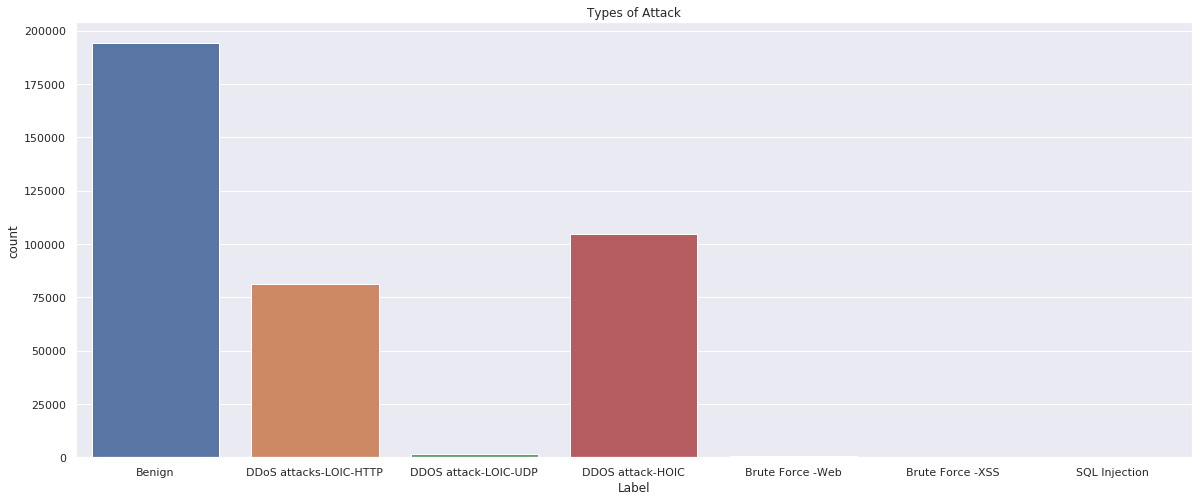

In [222]:
# Plot the Attack Type Amount
sns.set(rc={"figure.figsize":(20, 8)}) #width=20, #height=8
sns.countplot(data=network_data, x="Label").set(title='Types of Attack')
plt.show()

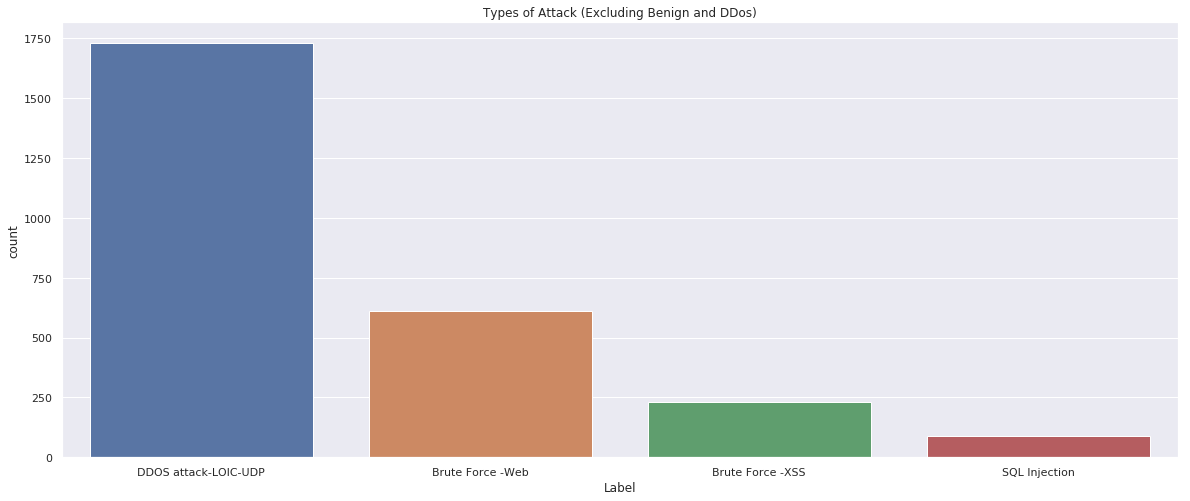

In [223]:
#Plot the lesser seen attacks
sns.countplot(data=network_data[(network_data['Label'] != 'Benign') & (network_data['Label'] != 'DDOS attack-HOIC') & (network_data['Label'] != 'DDoS attacks-LOIC-HTTP')], x='Label').set(title='Types of Attack (Excluding Benign and DDos)')
plt.show()

## Packet Analysis

Knowing the distribution of packet lengths, packet count, and the average rate of packets per second can help detect malicious network traffic such as DDoS attack

#### Packet Lengths

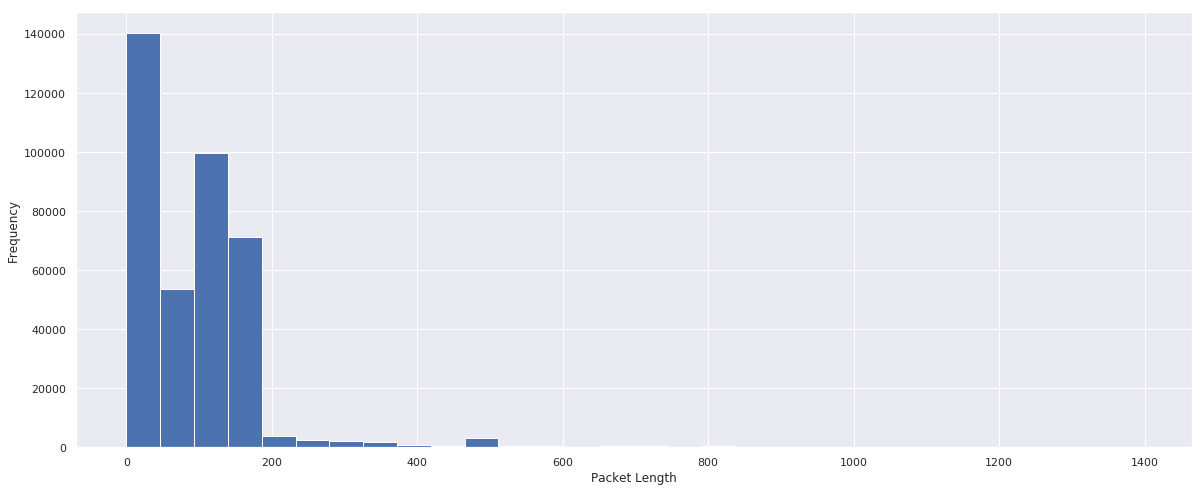

In [224]:
# Create a histogram of the packet lengths
network_data["Pkt Len Mean"].hist(bins=30)

# Set the x-axis label
plt.xlabel("Packet Length")

# Set the y-axis label
plt.ylabel("Frequency")

# Display the histogram
plt.show()

In [225]:
#Numerical Value : 
# Find the average 
avg_A = network_data['Pkt Len Mean'].mean()
print("Average of Packet Length:", avg_A)

# Find the range
range_B = network_data['Pkt Len Mean'].describe()['max'] - network_data['Pkt Len Mean'].describe()['min']
print("Range of Packet Length", range_B)

Average of Packet Length: 92.68686989288058
Range of Packet Length 1395.1090527595002


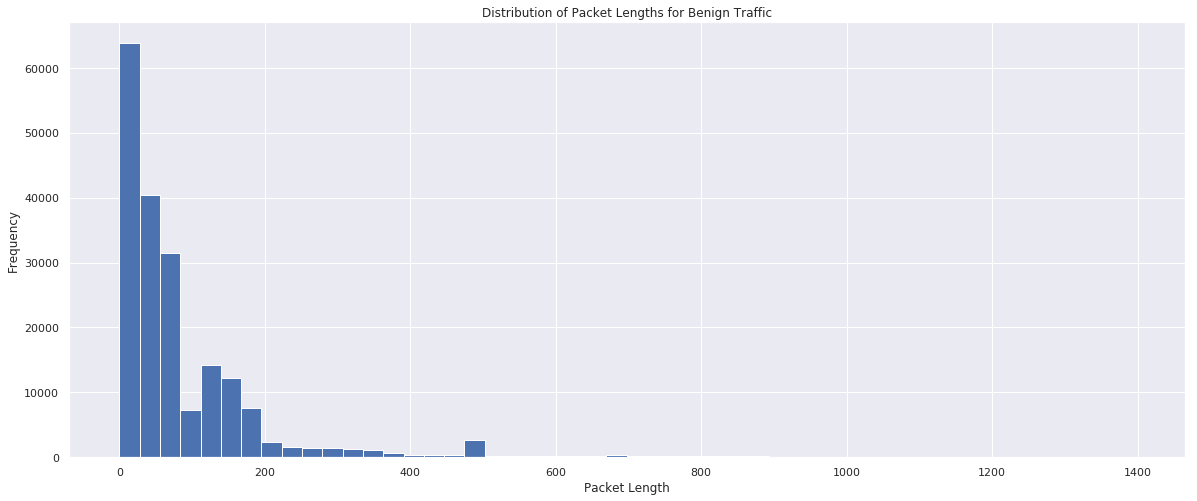

In [226]:
# Filter out only the benign traffic
df_benign = network_data[network_data["Label"] == "Benign"]

# Plot the distribution of packet lengths for benign traffic only
plt.hist(df_benign["Pkt Len Mean"], bins=50)
plt.title("Distribution of Packet Lengths for Benign Traffic")
plt.xlabel("Packet Length")
plt.ylabel("Frequency")
plt.show()

In [227]:
#Numerical Value :
# Find the average 
avg_A = df_benign['Pkt Len Mean'].mean()
print("Average of Packet Length:", avg_A)

# Find the range
range_B = df_benign['Pkt Len Mean'].describe()['max'] - df_benign['Pkt Len Mean'].describe()['min']
print("Range of Packet Length", range_B)

Average of Packet Length: 88.07056435566216
Range of Packet Length 1395.1090527595002


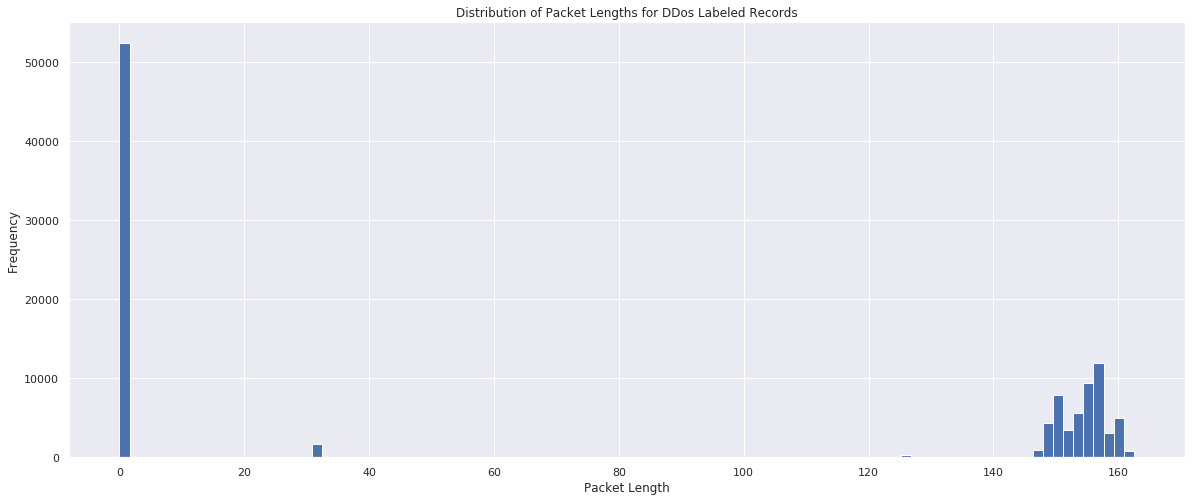

In [228]:
# filter the dataframe to include only records with labels containing the word "DDos"
df_ddos = network_data[network_data['Label'].str.contains('DDOS')]

# create a histogram of packet lengths for the filtered dataframe
plt.hist(df_ddos['Pkt Len Mean'], bins=100)
plt.xlabel('Packet Length')
plt.ylabel('Frequency')
plt.title('Distribution of Packet Lengths for DDos Labeled Records')
plt.show()

In [229]:
#Numerical Values : 
# Find the average 
avg_A = df_ddos['Pkt Len Mean'].mean()
print("Average of Packet Length:", avg_A)

# Find the range
range_B = df_ddos['Pkt Len Mean'].describe()['max'] - df_ddos['Pkt Len Mean'].describe()['min']
print("Range of Packet Length", range_B)

Average of Packet Length: 76.39350347483095
Range of Packet Length 162.5


#### Packet Counts

In [230]:
#Numerical Value :
# Find the average 
avg_A = df_benign['Tot Fwd Pkts'].mean()
print("Average of Total Fwd Packet:", avg_A)

# Find the average 
avg_A = df_benign['Tot Bwd Pkts'].mean()
print("Average of Total Bwd Packet:", avg_A)

Average of Total Fwd Packet: 7.020401644496193
Average of Total Bwd Packet: 9.92808935508135


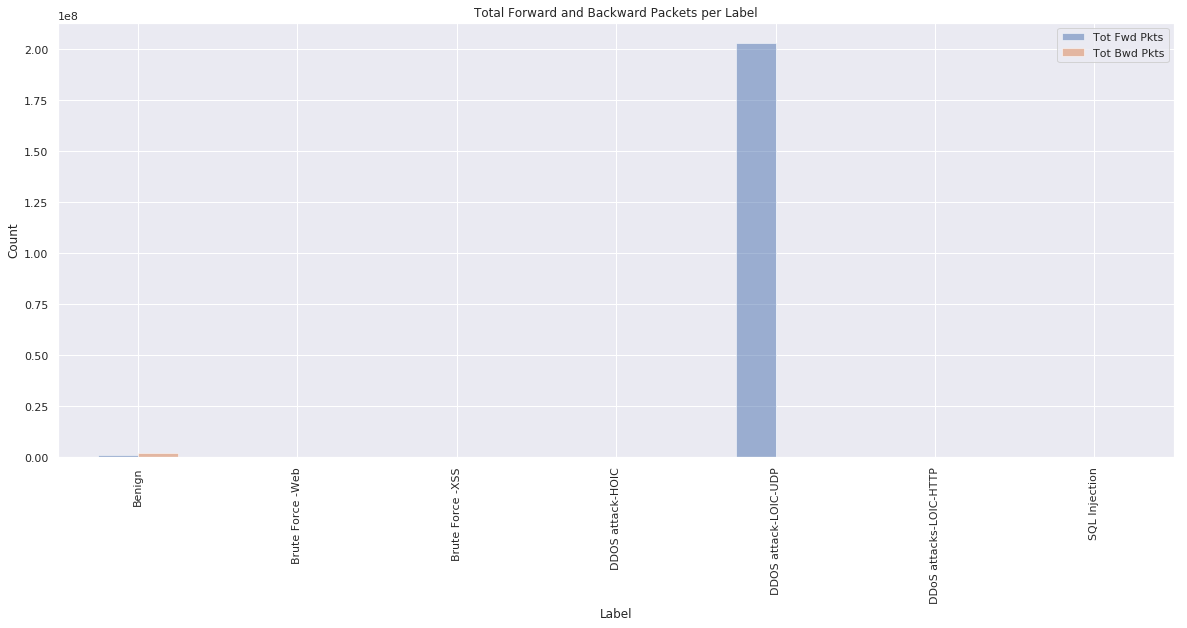

In [231]:
# Group by label and calculate the sum of total forward and backward packets
grouped = network_data.groupby(by='Label')[['Tot Fwd Pkts', 'Tot Bwd Pkts']].sum()

# Plot the histograms
grouped.plot(kind='bar', alpha=0.5, legend=True)

# Set the labels and title
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Total Forward and Backward Packets per Label')

# Show the plot
plt.show()

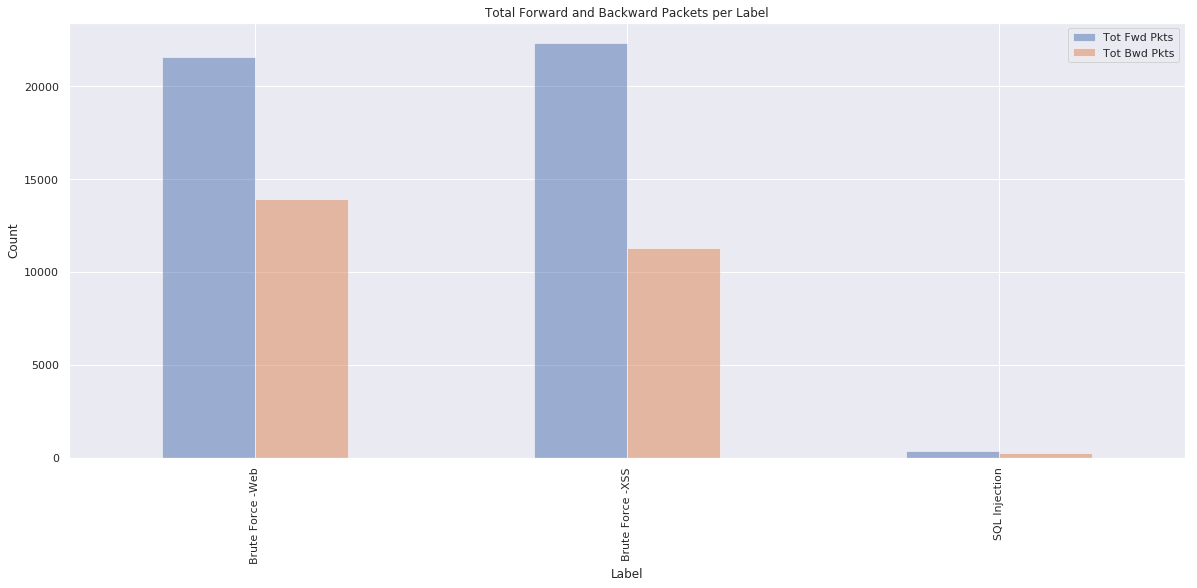

In [232]:
# Group by label and calculate the sum of total forward and backward packets
grouped = network_data[(~network_data['Label'].str.contains('DDOS', case=False)) & (network_data['Label'] != 'Benign')].groupby('Label')[['Tot Fwd Pkts', 'Tot Bwd Pkts']].sum()

# Plot the histograms
grouped.plot(kind='bar', alpha=0.5, legend=True)

# Set the labels and title
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Total Forward and Backward Packets per Label')

# Show the plot
plt.show()

In [233]:
# Calculate the average of column 'Value' for rows where 'Class' equals 'benign'
avg_benign = network_data.loc[network_data['Label'] == 'Benign', 'Tot Fwd Pkts'].mean()
avg_benign_bwd = network_data.loc[network_data['Label'] == 'Benign', 'Tot Bwd Pkts'].mean()

# Calculate the average of column 'Value' for rows where 'Class' does not equal 'benign'
avg_non_benign = network_data.loc[network_data['Label'] != 'Benign', 'Tot Fwd Pkts'].mean()
avg_non_benign_bwd = network_data.loc[network_data['Label'] != 'Benign', 'Tot Bwd Pkts'].mean()

# Print the results
print("Average of 'Tot Fwd Pkts' where 'Label' equals 'benign':", avg_benign)
print("Average of 'Tot Fwd Pkts' where 'Label' does not equal 'benign':", avg_non_benign)
print("Average of 'Tot Bwd Pkts' where 'Label' equals 'benign':", avg_benign_bwd)
print("Average of 'Tot Bwd Pkts' where 'Label' does not equal 'benign':", avg_non_benign_bwd)

Average of 'Tot Fwd Pkts' where 'Label' equals 'benign': 7.020401644496193
Average of 'Tot Fwd Pkts' where 'Label' does not equal 'benign': 1078.1305980425388
Average of 'Tot Bwd Pkts' where 'Label' equals 'benign': 9.92808935508135
Average of 'Tot Bwd Pkts' where 'Label' does not equal 'benign': 2.9689591983730192


#### Average Rate

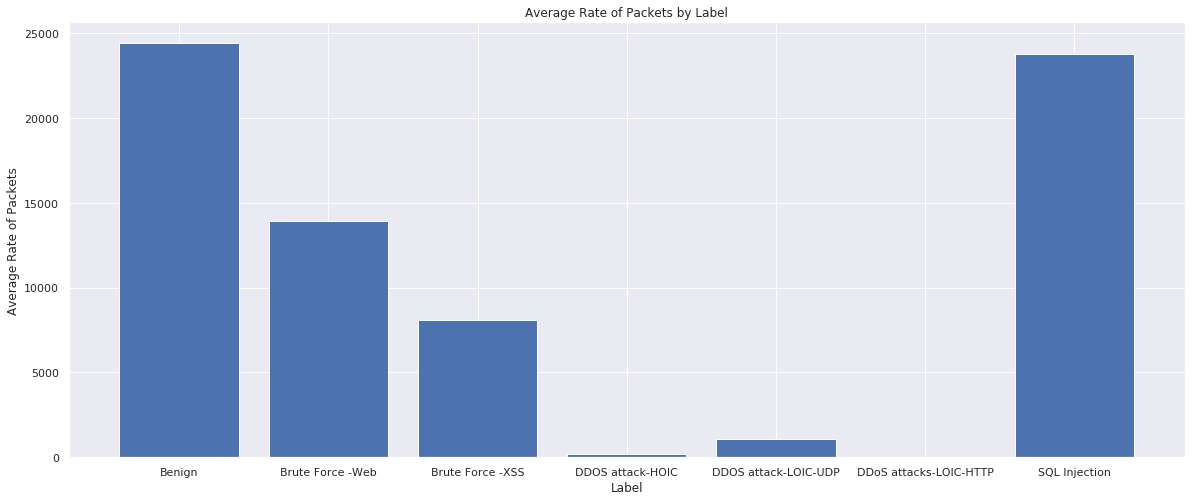

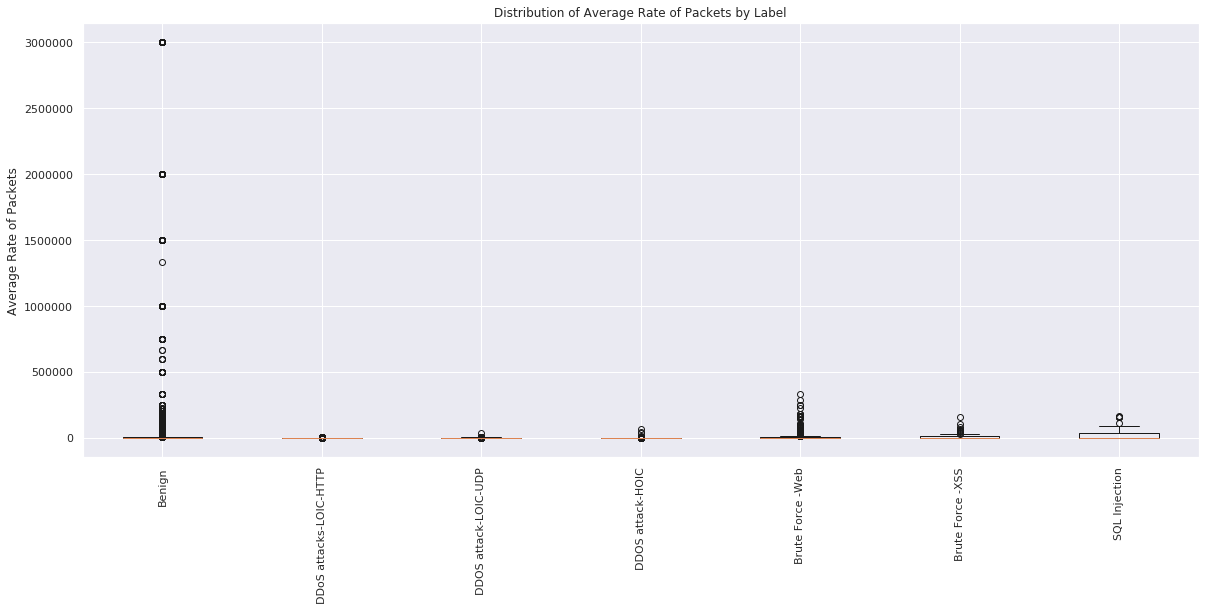

In [234]:
# Calculate the average rate of packets for each label
avg_rate = network_data.groupby("Label").mean()["Fwd Pkts/s"]

# Create a bar chart to visualize the average rate of packets for each label
plt.bar(avg_rate.index, avg_rate)
plt.title("Average Rate of Packets by Label")
plt.xlabel("Label")
plt.ylabel("Average Rate of Packets")
plt.show()

# Create a box plot to visualize the distribution of average rate of packets for each label
plt.boxplot([network_data[network_data["Label"] == label]["Fwd Pkts/s"] for label in network_data["Label"].unique()])
plt.title("Distribution of Average Rate of Packets by Label")
plt.xticks(range(1, len(network_data["Label"].unique()) + 1), network_data["Label"].unique(), rotation=90)
plt.ylabel("Average Rate of Packets")
plt.show()

In [235]:
#Numerical Value : 
# Find the average 
avg_A = network_data['Fwd Pkts/s'].mean()
print("Average of Forward Packet per Second Overall:", avg_A)

# Find the average 
avg_A = network_data['Bwd Pkts/s'].mean()
print("Average of Backword Packet per Second Overall:", avg_A)
print()

# Calculate the average of column 'Value' for rows where 'Class' equals 'benign'
avg_benign = network_data.loc[network_data['Label'] == 'Benign', 'Fwd Pkts/s'].mean()
avg_benign_bwd = network_data.loc[network_data['Label'] == 'Benign', 'Bwd Pkts/s'].mean()

# Calculate the average of column 'Value' for rows where 'Class' does not equal 'benign'
avg_non_benign = network_data.loc[network_data['Label'] != 'Benign', 'Fwd Pkts/s'].mean()
avg_non_benign_bwd = network_data.loc[network_data['Label'] != 'Benign', 'Bwd Pkts/s'].mean()

# Print the results
print("Average of 'Tot Fwd Pkts' where 'Label' equals 'benign':", avg_benign)
print("Average of 'Tot Fwd Pkts' where 'Label' does not equal 'benign':", avg_non_benign)
print("Average of 'Tot Bwd Pkts' where 'Label' equals 'benign':", avg_benign_bwd)
print("Average of 'Tot Bwd Pkts' where 'Label' does not equal 'benign':", avg_non_benign_bwd)

Average of Forward Packet per Second Overall: 12469.602552344237
Average of Backword Packet per Second Overall: 1558.7832902123403

Average of 'Tot Fwd Pkts' where 'Label' equals 'benign': 24415.004508141257
Average of 'Tot Fwd Pkts' where 'Label' does not equal 'benign': 189.78299031508897
Average of 'Tot Bwd Pkts' where 'Label' equals 'benign': 2990.1049892938186
Average of 'Tot Bwd Pkts' where 'Label' does not equal 'benign': 87.39101182959928


## Timestamp Analysis ##
Information about what time of day malicious attacks took place

### Benign ###

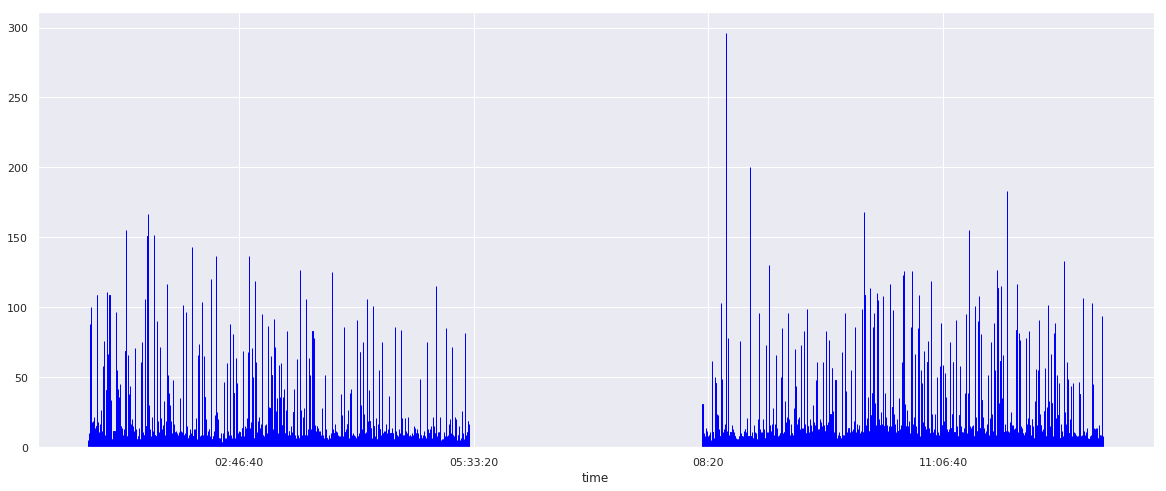

In [236]:
benign_data = network_data.loc[network_data['Label'] == 'Benign']
benign_timestamps = pd.to_datetime(benign_data["Timestamp"], format='%d/%m/%Y %H:%M:%S', errors='coerce')
benign_timestamps_counters = benign_timestamps.dt.time.value_counts().sort_index()
bars = plt.bar(benign_timestamps_counters.index, benign_timestamps_counters.values, label="Benign")
for bar in bars:
    bar.set_color("blue")
plt.show()

### Non-Benign ###

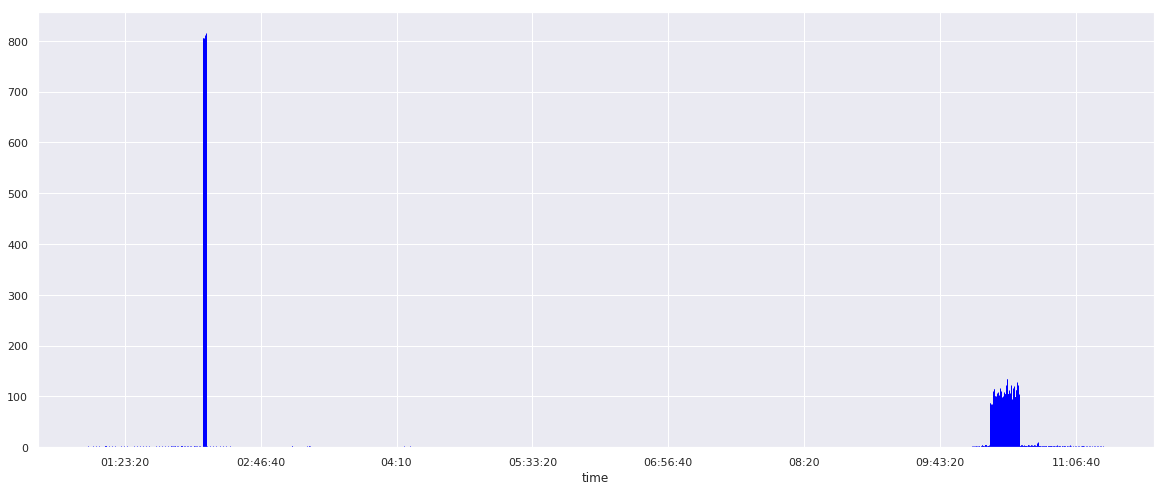

In [237]:
nonbenign_data = network_data.loc[network_data['Label'] != 'Benign']
nonbenign_timestamps = pd.to_datetime(nonbenign_data["Timestamp"], format='%d/%m/%Y %H:%M:%S', errors='coerce')
nonbenign_timestamp_counts = nonbenign_timestamps.dt.time.value_counts().sort_index()
bars = plt.bar(nonbenign_timestamp_counts.index, nonbenign_timestamp_counts.values, label="Non-Benign")
for bar in bars:
    bar.set_color("blue")
plt.show()

## Flag Analysis

Information about flag counts, such as FIN, SYN, RST, PSH, ACK, URG, and ECE can help identify specific types of attacks, such as TCP SYN flooding,

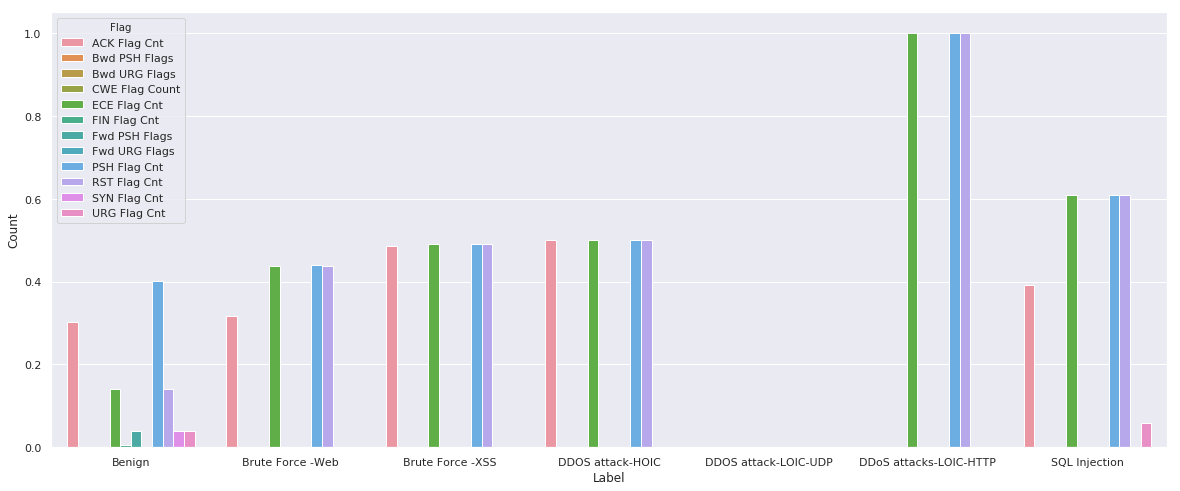

In [238]:
# Filter the columns containing the word 'flag'
flag_cols = [col for col in network_data.columns if 'Flag' in col]

# Calculate the average count of each flag for each label
avg_flag_counts = network_data.groupby('Label')[flag_cols].mean()

# Reshape the dataframe for plotting
avg_flag_counts = avg_flag_counts.reset_index().melt(id_vars='Label', var_name='Flag', value_name='Count')

# Plot the results using a barplot
sns.barplot(data=avg_flag_counts, x='Label', y='Count', hue='Flag')

## Flow Duration

Information on flow duration and idle time can help identify long-lived network connections that are potentially malicious or unwanted. 

#### Duration

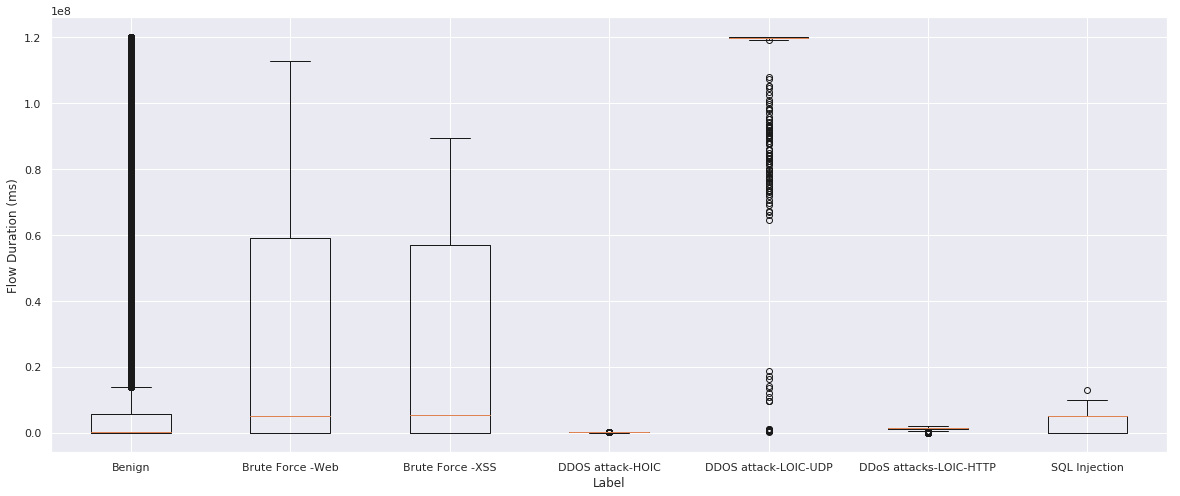

In [239]:
# Group by label and calculate the mean flow duration
label_mean_duration = network_data.groupby('Label')['Flow Duration'].mean()

# Plot the boxplot
plt.boxplot([network_data[network_data['Label'] == label]['Flow Duration'] for label in label_mean_duration.index],
            labels=label_mean_duration.index)
plt.xlabel('Label')
plt.ylabel('Flow Duration (ms)')
plt.show()

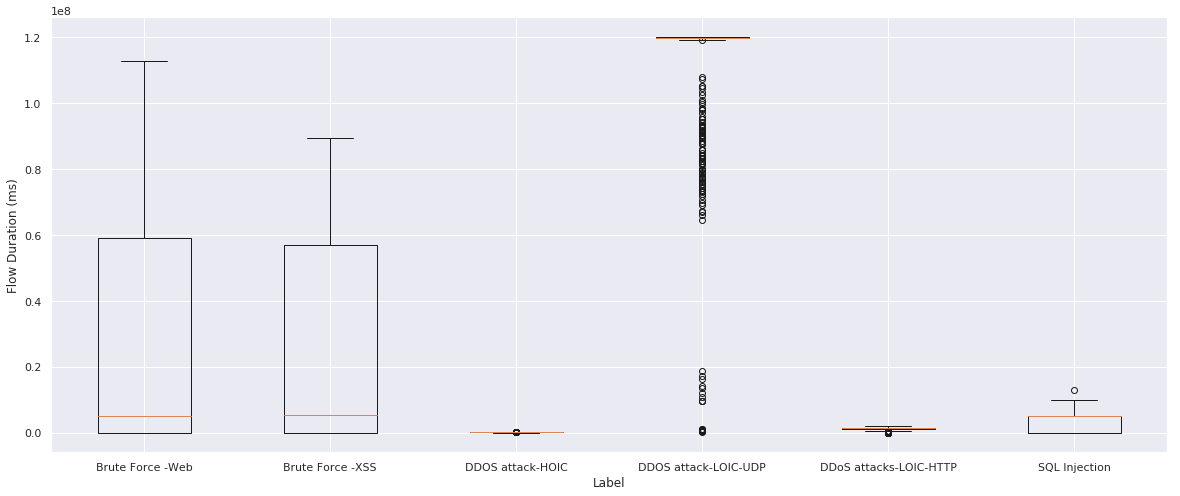

In [240]:
# Group by label and calculate the mean flow duration
label_mean_duration = network_data[network_data['Label'] != 'Benign'].groupby('Label')['Flow Duration'].mean()

# Plot the boxplot
plt.boxplot([network_data[network_data['Label'] == label]['Flow Duration'] for label in label_mean_duration.index],
            labels=label_mean_duration.index)
plt.xlabel('Label')
plt.ylabel('Flow Duration (ms)')
plt.show()

In [241]:
#Numerical Value : 
# Find the average 
avg_A = network_data['Flow Duration'].mean()
print("Average Flow Duration Overall:", avg_A)

# Calculate the average of column 'Value' for rows where 'Class' equals 'benign'
avg_benign = network_data.loc[network_data['Label'] == 'Benign', 'Flow Duration'].mean()
avg_benign_bwd = network_data.loc[network_data['Label'] == 'Benign', 'Flow Duration'].mean()
# Print the results
print("Average of Flow Duration where 'Label' equals 'benign':", avg_benign)
print("Average of Flow Duration where 'Label' does not equal 'benign':", avg_non_benign)

Average Flow Duration Overall: 10880514.665494962
Average of Flow Duration where 'Label' equals 'benign': 19734098.93042833
Average of Flow Duration where 'Label' does not equal 'benign': 189.78299031508897


#### Idle Time

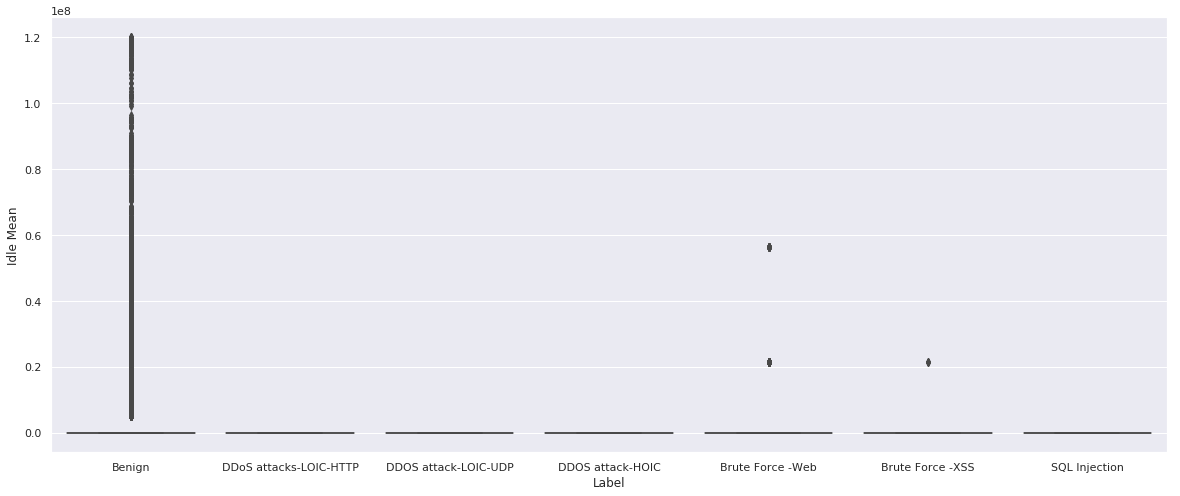

In [242]:
# create a box plot
sns.boxplot(x='Label', y='Idle Mean', data=network_data)

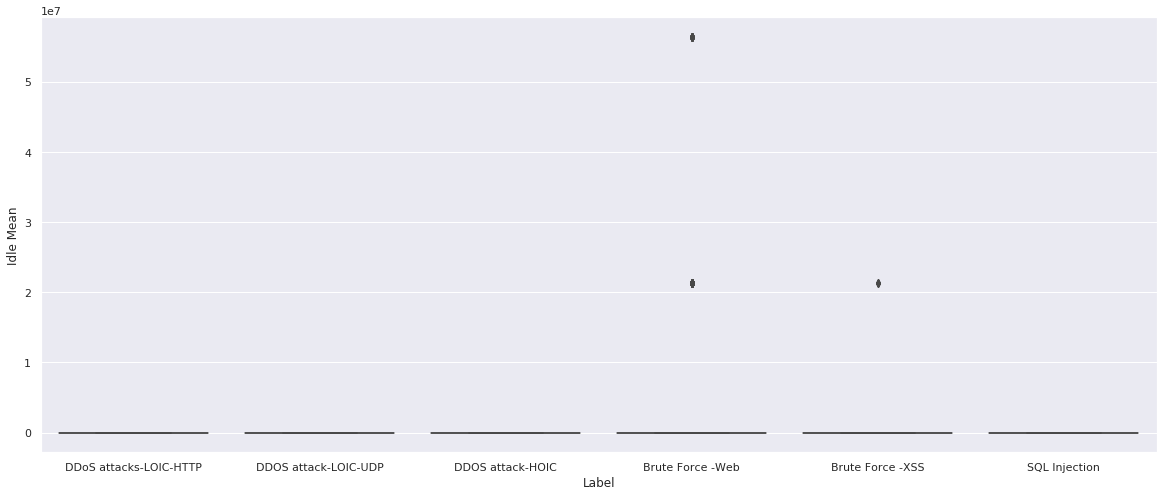

In [243]:
# create a box plot
sns.boxplot(x='Label', y='Idle Mean', data=network_data[network_data['Label'] != "Benign"])

In [244]:
#Numerical Value : 
# Find the average 
avg_A = network_data['Idle Mean'].mean()
print("Average Idle Time Overall:", avg_A)

# Calculate the average of column 'Value' for rows where 'Class' equals 'benign'
avg_benign = network_data.loc[network_data['Label'] == 'Benign', 'Idle Mean'].mean()
avg_benign_bwd = network_data.loc[network_data['Label'] == 'Benign', 'Idle Mean'].mean()
# Print the results
print("Average of Idle Time where 'Label' equals 'benign':", avg_benign)
print("Average of Idle Time where 'Label' does not equal 'benign':", avg_non_benign)

Average Idle Time Overall: 4482993.476313841
Average of Idle Time where 'Label' equals 'benign': 8823495.319325114
Average of Idle Time where 'Label' does not equal 'benign': 189.78299031508897


## Features

features such as the flow's down/up ratio, subflow packet counts, and packet size variance can help identify and classify network traffic based on its directionality, which can be useful for monitoring and identifying suspicious behavior.

#### Down/Up Ratio

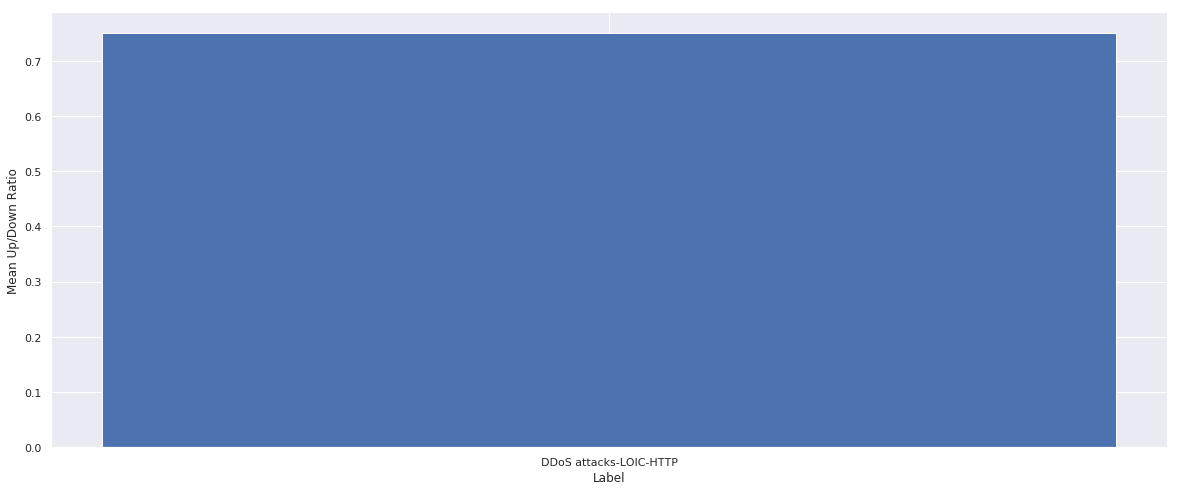

In [245]:
# Calculate the up/down ratio for each row
network_data["up_down_ratio"] = network_data["Tot Fwd Pkts"] / network_data["Tot Bwd Pkts"]

# Group the data by label and calculate the mean up/down ratio for each label
up_down_ratio_by_label = network_data.groupby("Label")["up_down_ratio"].mean()

# Plot the mean up/down ratio for each label using a bar chart
plt.bar(up_down_ratio_by_label.index, up_down_ratio_by_label.values)
plt.xlabel("Label")
plt.ylabel("Mean Up/Down Ratio")
plt.show()

#### SubFlow Packet Counts

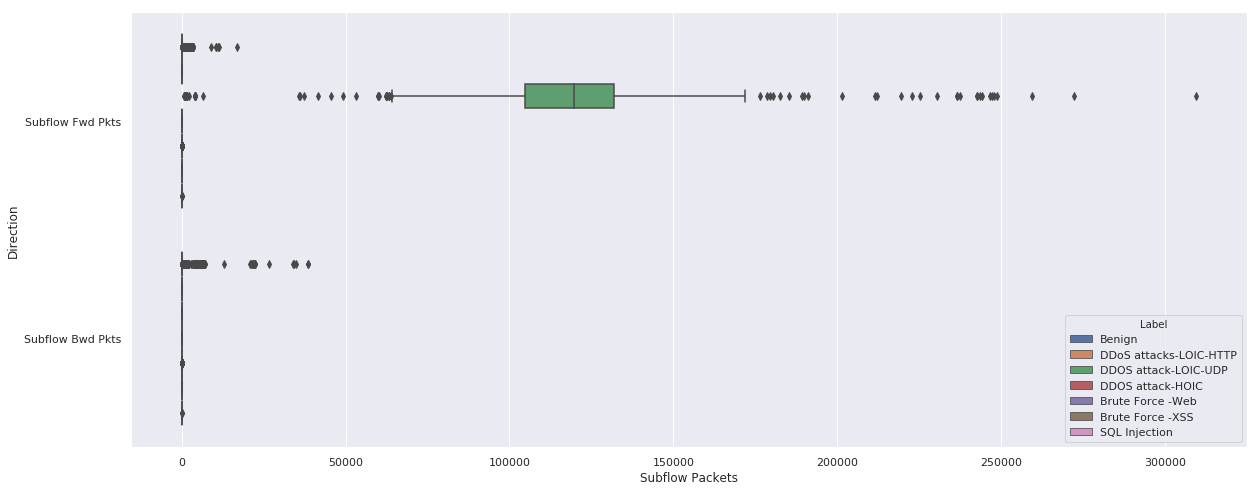

In [246]:
# Filter the data to only include the subflow packet count and label columns
subflow_df = network_data[['Subflow Fwd Pkts', 'Subflow Bwd Pkts', 'Label']]

# Melt the DataFrame so that there is a separate row for each subflow packet count value
subflow_melted = pd.melt(subflow_df, id_vars=['Label'], value_vars=['Subflow Fwd Pkts', 'Subflow Bwd Pkts'], var_name='Direction', value_name='Subflow Packets')

# Create a boxplot using seaborn
sns.boxplot(x='Subflow Packets', y='Direction', hue='Label', data=subflow_melted)

In [247]:
#Numerical Value : 
# Find the average 
avg_A = network_data['Subflow Fwd Pkts'].mean()
print("Average of Forward Packet per Second in Subflows:", avg_A)

# Find the average 
avg_A = network_data['Subflow Bwd Pkts'].mean()
print("Average of Backword Packet per Second in Subflows:", avg_A)
print()

# Calculate the average of column 'Value' for rows where 'Class' equals 'benign'
avg_benign = network_data.loc[network_data['Label'] == 'Benign', 'Subflow Fwd Pkts'].mean()
avg_benign_bwd = network_data.loc[network_data['Label'] == 'Benign', 'Subflow Bwd Pkts'].mean()

# Calculate the average of column 'Value' for rows where 'Class' does not equal 'benign'
avg_non_benign = network_data.loc[network_data['Label'] != 'Benign', 'Subflow Fwd Pkts'].mean()
avg_non_benign_bwd = network_data.loc[network_data['Label'] != 'Benign', 'Subflow Bwd Pkts'].mean()

# Print the results
print("Average of 'Subflow Fwd Pkts' where 'Label' equals 'benign':", avg_benign)
print("Average of 'Subflow Fwd Pkts' where 'Label' does not equal 'benign':", avg_non_benign)
print("Average of 'Subflow Bwd Pkts' where 'Label' equals 'benign':", avg_benign_bwd)
print("Average of 'Subflow Bwd Pkts' where 'Label' does not equal 'benign':", avg_non_benign_bwd)

Average of Forward Packet per Second in Subflows: 535.1824176455533
Average of Backword Packet per Second in Subflows: 6.496558009808888

Average of 'Subflow Fwd Pkts' where 'Label' equals 'benign': 7.020401644496193
Average of 'Subflow Fwd Pkts' where 'Label' does not equal 'benign': 1078.1305980425388
Average of 'Subflow Bwd Pkts' where 'Label' equals 'benign': 9.92808935508135
Average of 'Subflow Bwd Pkts' where 'Label' does not equal 'benign': 2.9689591983730192


#### Packet Size Variance

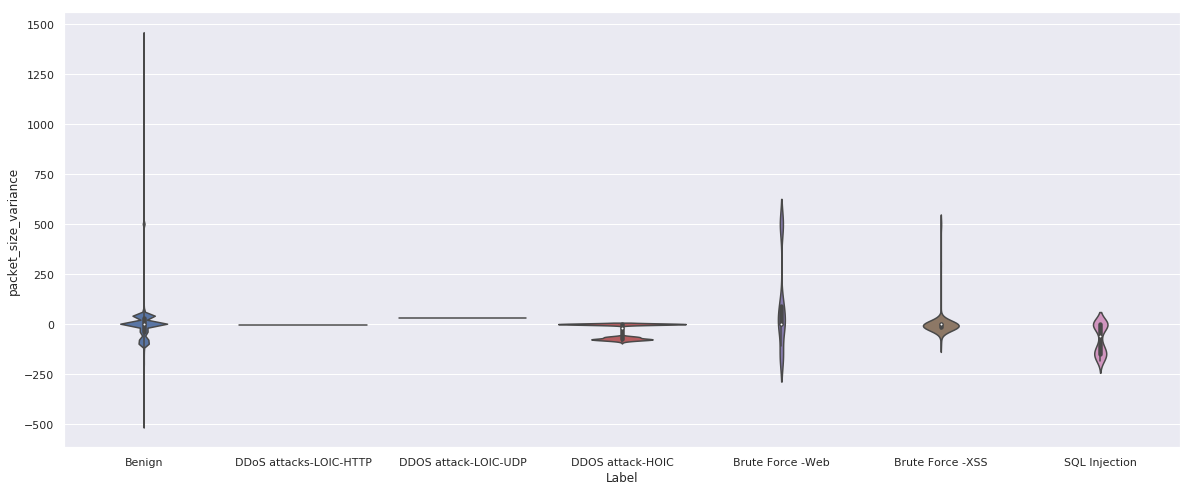

In [248]:
# Create a new column for packet size variance
network_data['packet_size_variance'] = network_data['Fwd Pkt Len Mean'] - network_data['Fwd Pkt Len Std']

# Create a violin plot of packet size variance by label
sns.violinplot(x='Label', y='packet_size_variance', data=network_data)

In [249]:
#Calculate Average Value
#Numerical Value : 
# Find the average 
avg_A = network_data['packet_size_variance'].mean()
print("Average Packet Size Variance:", avg_A)

# Calculate the average of column 'Value' for rows where 'Class' equals 'benign'
avg_benign = network_data.loc[network_data['Label'] == 'Benign', 'packet_size_variance'].mean()
avg_non_benign = network_data.loc[network_data['Label'] != 'Benign', 'packet_size_variance'].mean()
# Print the results
print("Average of Packet Size Variance where 'Label' equals 'benign':", avg_benign)
print("Average of Packet Size Variance where 'Label' does not equal 'benign':", avg_non_benign)

Average Packet Size Variance: -13.669999467138169
Average of Packet Size Variance where 'Label' equals 'benign': -5.771633159308294
Average of Packet Size Variance where 'Label' does not equal 'benign': -21.789484558878883


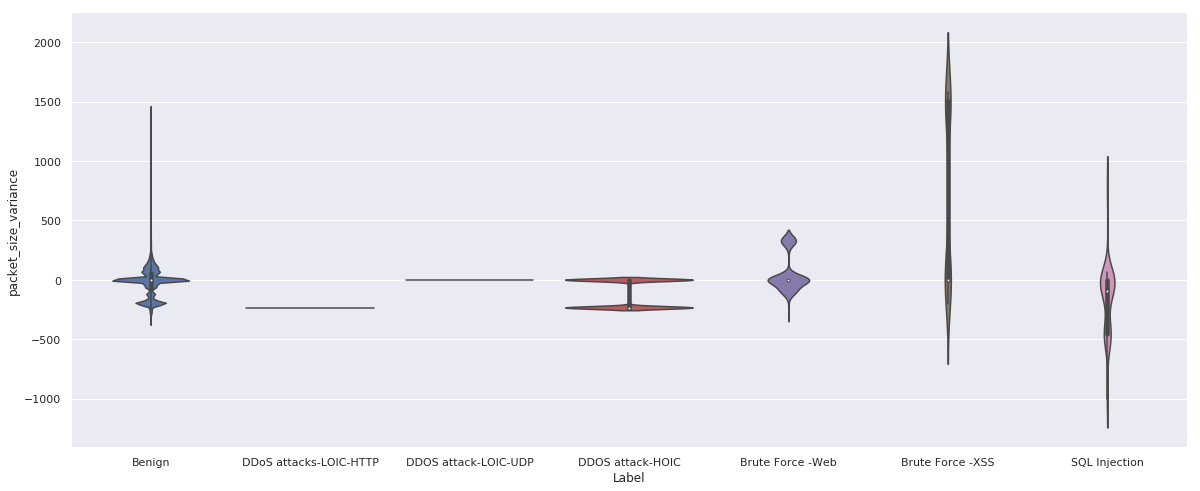

In [250]:
# Create a new column for packet size variance
network_data['packet_size_variance'] = network_data['Bwd Pkt Len Mean'] - network_data['Bwd Pkt Len Std']

# Create a violin plot of packet size variance by label
sns.violinplot(x='Label', y='packet_size_variance', data=network_data)

In [251]:
#Calculate Average Value
#Numerical Value : 
# Find the average 
avg_A = network_data['packet_size_variance'].mean()
print("Average Packet Size Variance:", avg_A)

# Calculate the average of column 'Value' for rows where 'Class' equals 'benign'
avg_benign = network_data.loc[network_data['Label'] == 'Benign', 'packet_size_variance'].mean()
avg_non_benign = network_data.loc[network_data['Label'] != 'Benign', 'packet_size_variance'].mean()
# Print the results
print("Average of Packet Size Variance where 'Label' equals 'benign':", avg_benign)
print("Average of Packet Size Variance where 'Label' does not equal 'benign':", avg_non_benign)

Average Packet Size Variance: -89.03164148579572
Average of Packet Size Variance where 'Label' equals 'benign': -12.403437652569908
Average of Packet Size Variance where 'Label' does not equal 'benign': -167.8050908778998


## CNN for Mork

#### Data Preprocessing

In [252]:
# check for some null or missing values in our dataset
network_data.isna().sum().to_numpy()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [253]:
# drop null or missing columns
network_data = network_data.dropna()
network_data.isna().sum().to_numpy()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

#### Encoding Categorical Data

In [254]:
network_data['Label'].unique()

array(['Benign', 'DDoS attacks-LOIC-HTTP', 'DDOS attack-LOIC-UDP',
       'DDOS attack-HOIC', 'Brute Force -Web', 'Brute Force -XSS',
       'SQL Injection'], dtype=object)

In [255]:
# encode the column labels
label_encoder = LabelEncoder()
network_data['Label']= label_encoder.fit_transform(network_data['Label'])
network_data['Label'].unique()

array([0, 5, 4, 3, 1, 2, 6])

In [256]:
# check for encoded labels
network_data['Label'].value_counts()

0    194102
3    104750
5     81408
4      1730
1       611
2       230
6        87
Name: Label, dtype: int64

#### Shaping Data

In [257]:
# make 3 seperate datasets for 3 feature labels
data_1 = network_data[network_data['Label'] == 0]
data_2 = network_data[network_data['Label'] == 1]
data_3 = network_data[network_data['Label'] == 2]
data_4 = network_data[network_data['Label'] == 3]
data_5 = network_data[network_data['Label'] == 4]
data_6 = network_data[network_data['Label'] == 5]


# make benign feature
y_1 = np.zeros(data_1.shape[0])
y_benign = pd.DataFrame(y_1)

# make Brute Force-Web feature
y_2 = np.ones(data_2.shape[0])
y_bf = pd.DataFrame(y_2)

# make Brute Force-XSS feature
y_3 = np.full(data_3.shape[0], 2)
y_xss = pd.DataFrame(y_3)

# make DDOS-HOICE feature
y_4 = np.full(data_4.shape[0], 3)
y_ddos = pd.DataFrame(y_4)

# make DDOS-LOIC feature
y_5 = np.full(data_5.shape[0], 4)
y_loic = pd.DataFrame(y_5)

# make SQL Injection feature
y_6 = np.full(data_6.shape[0], 5)
y_sql = pd.DataFrame(y_6)

# merging the original dataframe
X = pd.concat([data_1, data_2, data_3, data_4, data_5, data_6], sort=True)
y = pd.concat([y_benign, y_bf, y_xss, y_ddos, y_loic, y_sql], sort=True)

print(X.shape)
print(y.shape)

(382831, 86)
(382831, 1)


#### Data Augmentation

In [258]:
from sklearn.utils import resample

data_1_resample = resample(data_1, n_samples=20000, 
                           random_state=123, replace=True)
data_2_resample = resample(data_2, n_samples=20000, 
                           random_state=123, replace=True)
data_3_resample = resample(data_3, n_samples=20000, 
                           random_state=123, replace=True)
data_4_resample = resample(data_4, n_samples=20000, 
                           random_state=123, replace=True)
data_5_resample = resample(data_5, n_samples=20000, 
                           random_state=123, replace=True)
data_6_resample = resample(data_6, n_samples=20000, 
                           random_state=123, replace=True)

train_dataset = pd.concat([data_1_resample, data_2_resample, data_3_resample, data_4_resample, data_5_resample, data_6_resample])
train_dataset.head()

,ACK Flag Cnt,Active Max,Active Mean,Active Min,Active Std,Bwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Header Len,Bwd IAT Max,Bwd IAT Mean,...,Subflow Fwd Byts,Subflow Fwd Pkts,Timestamp,Tot Bwd Pkts,Tot Fwd Pkts,TotLen Bwd Pkts,TotLen Fwd Pkts,URG Flag Cnt,up_down_ratio,packet_size_variance
13800,0.0,136223.0,136223.0,136223.0,0.000000,0.0,0.0,132.0,34650.0,1.143960e+04,...,353.0,8.0,22/02/2018 05:13:37,6.0,8.0,3853.0,353.0,0.0,1.333333,-37.704032
26105,0.0,408356.0,72988.0,17025.0,147883.398797,0.0,0.0,372.0,10099898.0,4.425706e+06,...,377.0,13.0,22/02/2018 09:30:08,18.0,13.0,5450.0,377.0,0.0,0.722222,-229.564168
15805,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,8.0,0.0,0.000000e+00,...,34.0,1.0,22/02/2018 12:59:22,1.0,1.0,79.0,34.0,0.0,1.000000,79.000000
94132,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000e+00,...,0.0,2.0,23/02/2018 01:57:01,0.0,2.0,0.0,0.0,0.0,inf,0.000000
21562,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,8.0,0.0,0.000000e+00,...,74.0,1.0,23/02/2018 04:37:20,1.0,1.0,156.0,74.0,0.0,1.000000,156.000000


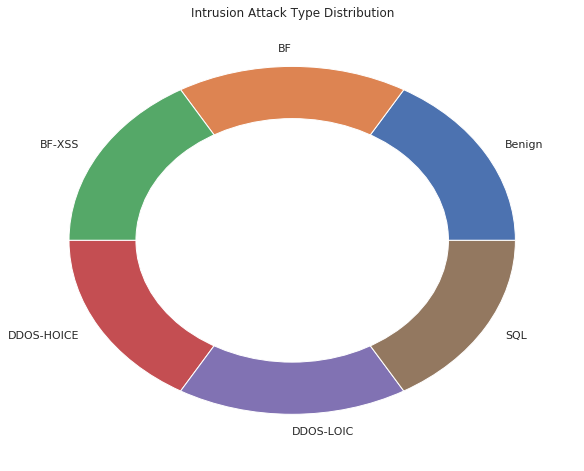

In [259]:
# viewing the distribution of intrusion attacks in our dataset 
plt.figure(figsize=(10, 8))
circle = plt.Circle((0, 0), 0.7, color='white')
plt.title('Intrusion Attack Type Distribution')
plt.pie(train_dataset['Label'].value_counts(), labels=['Benign', 'BF', 'BF-XSS', 'DDOS-HOICE', 'DDOS-LOIC', 'SQL'])
p = plt.gcf()
p.gca().add_artist(circle)

#### Test-Train Split

In [260]:
test_dataset = train_dataset.sample(frac=0.1)
target_train = train_dataset['Label']
target_test = test_dataset['Label']
target_train.unique(), target_test.unique()

(array([0, 1, 2, 3, 4, 5]), array([4, 5, 2, 1, 0, 3]))

In [261]:
y_train = to_categorical(target_train, num_classes=6)
y_test = to_categorical(target_test, num_classes=6)

#### Data Splicing

In [262]:
train_dataset = train_dataset.drop(columns = ["Timestamp", "Protocol","PSH Flag Cnt","Init Fwd Win Byts","Flow Byts/s","Flow Pkts/s", "Label"], axis=1)
test_dataset = test_dataset.drop(columns = ["Timestamp", "Protocol","PSH Flag Cnt","Init Fwd Win Byts","Flow Byts/s","Flow Pkts/s", "Label"], axis=1)

In [263]:
# making train & test splits
X_train = train_dataset.iloc[:, :-1].values
X_test = test_dataset.iloc[:, :-1].values
X_test

array([[0.0, 0.0, 0.0, ..., 4354144.0, 0.0, inf],
       [0.0, 0.0, 0.0, ..., 20.0, 0.0, 0.75],
       [0.0, 0.0, 0.0, ..., 56083.0, 0.0, 1.9519230769230769],
       ...,
       [0.0, 0.0, 0.0, ..., 84.0, 0.0, 1.0],
       [1.0, 0.0, 0.0, ..., 0.0, 0.0, inf],
       [0.0, 4000386.0, 4000386.0, ..., 3000.0, 0.0, inf]], dtype=object)

In [264]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120000, 78)
(12000, 78)
(120000, 6)
(12000, 6)


In [265]:
# reshape the data for CNN
X_train = X_train.reshape(len(X_train), X_train.shape[1], 1)
X_test = X_test.reshape(len(X_test), X_test.shape[1], 1)
X_train.shape, X_test.shape

((120000, 78, 1), (12000, 78, 1))

In [266]:
# making the deep learning function
def model():
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=6, activation='relu', 
                    padding='same', input_shape=(72, 1)))
    model.add(BatchNormalization())
    
    # adding a pooling layer
    model.add(MaxPooling1D(pool_size=(3), strides=2, padding='same'))
    
    model.add(Conv1D(filters=64, kernel_size=6, activation='relu', 
                    padding='same', input_shape=(72, 1)))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=(3), strides=2, padding='same'))
    
    model.add(Conv1D(filters=64, kernel_size=6, activation='relu', 
                    padding='same', input_shape=(72, 1)))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=(3), strides=2, padding='same'))
    
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(6, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [267]:
model = model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_10 (Conv1D)           (None, 72, 64)            448       
_________________________________________________________________
batch_normalization_10 (Batc (None, 72, 64)            256       
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, 36, 64)            0         
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 36, 64)            24640     
_________________________________________________________________
batch_normalization_11 (Batc (None, 36, 64)            256       
_________________________________________________________________
max_pooling1d_11 (MaxPooling (None, 18, 64)            0         
_________________________________________________________________
conv1d_12 (Conv1D)           (None, 18, 64)            24640     
__________

In [268]:
his = model.fit(X_train, y_train, epochs=30, batch_size=32, 
          validation_data=(X_test, y_test))

ValueError: Error when checking input: expected conv1d_10_input to have shape (72, 1) but got array with shape (78, 1)

#### Visualization of Results

In [ ]:
# check the model performance on test data
scores = model.evaluate(X_test, y_test)
print("%s: %.2f%%" % (model.metrics_name))

In [ ]:
# check history of model
history = his.history
history.keys()

In [ ]:
epochs = range(1, len(history['loss']) + 1)
acc = history['accuracy']
loss = history['loss']
val_acc = history['val_accuracy']
val_loss = history['val_loss']

# visualize training and val accuracy
plt.figure(figsize=(10, 5))
plt.title('Training and Validation Accuracy (CNN)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(epochs, acc, label='accuracy')
plt.plot(epochs, val_acc, label='val_acc')
plt.legend()

# visualize train and val loss
plt.figure(figsize=(10, 5))
plt.title('Training and Validation Loss(CNN)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(epochs, loss, label='loss', color='g')
plt.plot(epochs, val_loss, label='val_loss', color='r')
plt.legend()